In [1]:
import json
import pandas as pd

In [2]:
def load_data(path):
    data = []
    for index, line in enumerate(open(path, 'r', encoding="utf-8")):
        data.append(json.loads(line))
    df = pd.DataFrame(data)
    
    return df

In [3]:
path = r'D:\Yelp\yelp_academic_dataset_review.json'

In [4]:
df_review = load_data(path)

In [7]:
path = r'D:\Yelp\yelp_academic_dataset_business.json'

In [8]:
df_business = load_data(path)

In [9]:
df_review.head(1)

,review_id,user_id,business_id,stars,useful,funny,cool,text,date
0,xQY8N_XvtGbearJ5X4QryQ,OwjRMXRC0KyPrIlcjaXeFQ,-MhfebM0QIsKt87iDN-FNw,2.0,5,0,0,"As someone who has worked with many museums, I...",2015-04-15 05:21:16


In [13]:
df_review.shape

(8021122, 9)

In [11]:
df_business.head(1)

,business_id,name,address,city,state,postal_code,latitude,longitude,stars,review_count,is_open,attributes,categories,hours
0,f9NumwFMBDn751xgFiRbNA,The Range At Lake Norman,10913 Bailey Rd,Cornelius,NC,28031,35.462724,-80.852612,3.5,36,1,"{'BusinessAcceptsCreditCards': 'True', 'BikePa...","Active Life, Gun/Rifle Ranges, Guns & Ammo, Sh...","{'Monday': '10:0-18:0', 'Tuesday': '11:0-20:0'..."


In [14]:
df_business.shape

(209393, 14)

In [37]:
s = df_business.groupby(['state', 'city']).business_id.nunique()

<AxesSubplot:ylabel='state,city'>

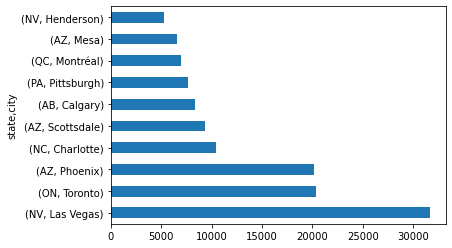

In [111]:
s[s>1].sort_values(ascending=False)[0:10].plot(kind='barh')

In [84]:
df_vegas = df_business[df_business.city=='Las Vegas']
df_vegas.shape

(31631, 14)

In [85]:
df_vegas = df_vegas.merge(df_review, on='business_id', suffixes=('_business', '_review'))

In [86]:
df_vegas.shape

(2444801, 22)

In [87]:
df_vegas.columns

Index(['business_id', 'name', 'address', 'city', 'state', 'postal_code',
       'latitude', 'longitude', 'stars_business', 'review_count', 'is_open',
       'attributes', 'categories', 'hours', 'review_id', 'user_id',
       'stars_review', 'useful', 'funny', 'cool', 'text', 'date'],
      dtype='object')

In [89]:
df_vegas['date'] =  pd.to_datetime(df_vegas['date'])

<AxesSubplot:>

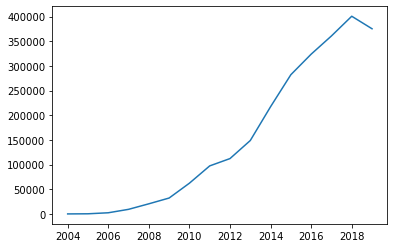

In [90]:
df_vegas.date.dt.year.value_counts().sort_index().plot()

In [91]:
df_vegas_2010 = df_vegas[df_vegas['date'].dt.year == 2010]

In [92]:
df_vegas_2010.to_csv(r'D:\Yelp\vegas_2010.csv')

In [118]:
df_charlotte = df_business[df_business.city=='Charlotte']
df_charlotte.shape

(10422, 14)

# Charlotte 2016

In [119]:
df_charlotte = df_charlotte.merge(df_review, on='business_id', suffixes=('_business', '_review'))

In [120]:
df_charlotte['date'] =  pd.to_datetime(df_charlotte['date'])

In [121]:
df_charlotte_2016 = df_charlotte[df_charlotte['date'].dt.year == 2016]

In [122]:
df_charlotte_2016.shape

(51261, 22)

In [123]:
df_charlotte_2016.to_csv(r'D:\Yelp\charlotte_2016.csv')